# Algorithm Evaluation
For given dataset which model is suitable based on best score

In [2]:
from warnings import filterwarnings

filterwarnings("ignore")

# How to import functions from utils

In [3]:
import os
import sys

cwd = os.getcwd()
print(cwd)

c:\ML_Ravet_28_Aug_2025\12 Algo Evaluation


In [4]:
root_dir = os.path.abspath(os.path.join(cwd, ".."))
print(root_dir)

c:\ML_Ravet_28_Aug_2025


In [5]:
sys.path.append(root_dir)

In [6]:
from utils import algo_evaluation

# Step 1 - Data Ingestion

In [7]:
import pandas as pd

df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Targer feature is y 
1. 0 - Not subscribed to term deposit
2. 1 - Subscribed to term deposit

In [8]:
df["loan_status"].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

# Step 3 - Perform basic data quality checks

In [9]:
df.shape

(58645, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [11]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.select_dtypes(include="object").nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

# Step 2 - Seperate X and Y(y)

In [15]:
X = df.drop(columns=["id", "loan_status"])
Y = df["loan_status"]

In [16]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [17]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

# Step 3 - Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
xtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15
17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9
32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3
55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11
40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2


In [20]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [21]:
xtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4
56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4
42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6
10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2
39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10


In [22]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [23]:
xtrain.shape

(46916, 11)

In [24]:
xtest.shape

(11729, 11)

# Step 4 - Apply preprocessing on X

In [25]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [26]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [29]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [30]:
pre = ColumnTransformer(
    [("num", num_pipe, num_cols), ("cat", cat_pipe, cat_cols)]
).set_output(transform="pandas")

In [31]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [32]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apply Algo evaluation

In [34]:
!uv add xgboost

Resolved 123 packages in 34ms
Audited 117 packages in 0.23ms


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(max_depth=3, random_state=42),
    RandomForestClassifier(max_depth=3, random_state=42),
    HistGradientBoostingClassifier(max_depth=3, random_state=42),
    XGBClassifier(max_depth=3, random_state=42),
]

In [37]:
best_res, best_model = algo_evaluation(models, xtrain_pre, ytrain, xtest_pre, ytest)

{'name': 'LogisticRegression', 'model': LogisticRegression(random_state=42), 'cv_mean': np.float64(0.7929), 'cv_std': np.float64(0.0071), 'f1_train': 0.793, 'f1_test': 0.7867, 'gen_err': 0.0063}
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(max_depth=3, random_state=42), 'cv_mean': np.float64(0.8219), 'cv_std': np.float64(0.0031), 'f1_train': 0.8256, 'f1_test': 0.8194, 'gen_err': 0.0062}
{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(max_depth=3, random_state=42), 'cv_mean': np.float64(0.6168), 'cv_std': np.float64(0.0076), 'f1_train': 0.6141, 'f1_test': 0.6095, 'gen_err': 0.0046}
{'name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(max_depth=3, random_state=42), 'cv_mean': np.float64(0.8732), 'cv_std': np.float64(0.0074), 'f1_train': 0.8778, 'f1_test': 0.8751, 'gen_err': 0.0027}
{'name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, cols

In [38]:
best_res

,name,model,cv_mean,cv_std,f1_train,f1_test,gen_err
0,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.8894,0.0071,0.8957,0.8917,0.0040
1,HistGradientBoostingClassifier,"HistGradientBoostingClassifier(max_depth=3, ra...",0.8732,0.0074,0.8778,0.8751,0.0027
2,DecisionTreeClassifier,"DecisionTreeClassifier(max_depth=3, random_sta...",0.8219,0.0031,0.8256,0.8194,0.0062
3,LogisticRegression,LogisticRegression(random_state=42),0.7929,0.0071,0.7930,0.7867,0.0063
4,RandomForestClassifier,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.6168,0.0076,0.6141,0.6095,0.0046


In [39]:
best_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Evaluate the best model

In [40]:
best_model.score(xtrain_pre, ytrain)

0.9534913462358258

In [41]:
best_model.score(xtest_pre, ytest)

0.951828800409242

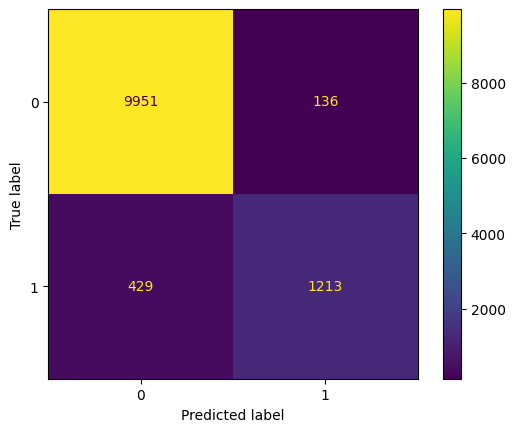

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest_pre, ytest)

In [45]:
from sklearn.metrics import classification_report

ypred_test = best_model.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



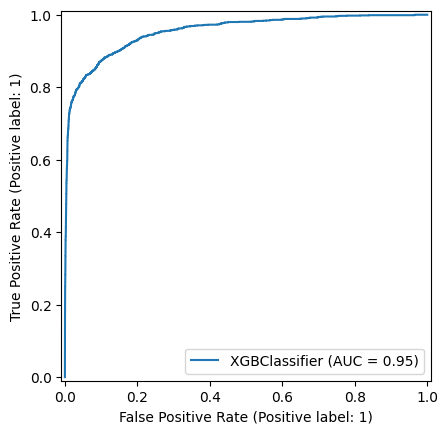

In [46]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest_pre, ytest)

# Above metrics confirm that this is a good model

# Out of sample prediction (Model Inference)

In [47]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [48]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.753930,0.126293,-0.429373,2.840512,1.671432,2.195805,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257371,0.826456,0.323935,0.143702,0.657589,-0.642411,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257371,-0.885054,0.072832,-0.935022,2.142144,-0.314924,-0.946495,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901266,-0.366415,-0.178270,-0.395660,-0.586672,-0.205762,0.292408,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257371,0.982048,0.826140,1.042639,1.855767,-0.096600,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [59]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 0, 0, 0])

In [52]:
best_model.classes_

array([0, 1])

In [61]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs

array([0.9952302 , 0.02626074, 0.37905812, ..., 0.01152722, 0.35460848,
       0.96537894], shape=(39098,), dtype=float32)

In [62]:
res = xnew[["id"]]
res["loan_status"] = preds
res["probability"] = probs.round(4)

In [63]:
res

,id,loan_status,probability
0,58645,1,0.9952
1,58646,0,0.0263
2,58647,0,0.3791
3,58648,0,0.0069
4,58649,0,0.0816
...,...,...,...
39093,97738,0,0.0816
39094,97739,0,0.0062
39095,97740,0,0.0115
39096,97741,0,0.3546


In [64]:
res[res["loan_status"] == 1]

,id,loan_status,probability
0,58645,1,0.9952
5,58650,1,0.9417
8,58653,1,0.5697
28,58673,1,0.6844
35,58680,1,0.9836
...,...,...,...
39085,97730,1,0.9752
39088,97733,1,0.8664
39089,97734,1,0.9807
39090,97735,1,0.9466


In [57]:
res["loan_status"].value_counts()

loan_status
0    34809
1     4289
Name: count, dtype: int64

In [65]:
res.to_csv("results.csv", index=False)

# Save model object and preprocessor

In [66]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [68]:
best_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [69]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [70]:
joblib.dump(best_model, "best_model.joblib")

['best_model.joblib']

# Load the model object and pre

In [71]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [72]:
m = joblib.load("best_model.joblib")
m

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [73]:
m.score(xtrain_pre, ytrain)

0.9534913462358258

In [74]:
m.score(xtest_pre, ytest)

0.951828800409242